In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [12]:
x,y = make_blobs(n_samples=1000,centers=3,n_features=2)

In [13]:
x

array([[ 1.77292045,  8.91872687],
       [ 4.01576478, -8.97645502],
       [-5.62036784, -4.38480596],
       ...,
       [ 3.82149286,  6.81760378],
       [ 5.12076317,  9.09108981],
       [ 2.37291981,  8.67789749]])

In [14]:
y

array([1, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 0, 2, 1, 0, 1, 0, 2, 1, 0, 0, 0,
       1, 2, 2, 0, 2, 1, 2, 1, 2, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 2,
       2, 2, 1, 2, 1, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2,
       0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 0, 2, 0,
       1, 1, 2, 1, 1, 0, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 1, 2,
       1, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 2, 1, 1, 1,
       2, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0, 1, 0, 1, 1, 1, 1,
       1, 2, 0, 0, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 1, 1, 1, 2, 1, 2,
       2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 1,
       0, 2, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 2, 0, 1, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 2, 2,
       2, 0, 0, 1, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0,

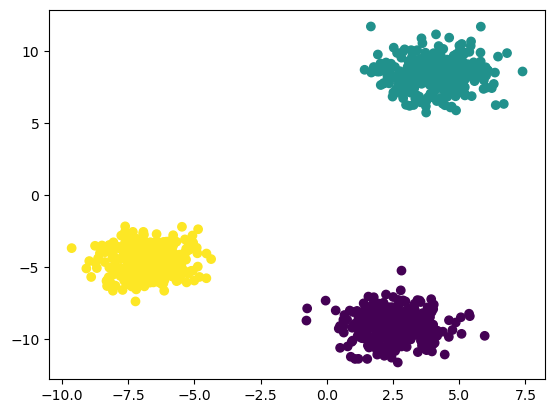

In [15]:
plt.scatter(x[:,0],x[:,1],c=y)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
from sklearn.cluster import KMeans

In [20]:
# Elbow method to select K value
wcss = []
for k in range(1,11) :
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

In [22]:
wcss

[1340.0000000000007,
 477.76643163969953,
 36.80441674120574,
 30.56815751304222,
 24.95117305187423,
 20.70556138211982,
 18.65859274420579,
 16.945915727769314,
 15.394090880167886,
 13.868411950184285]

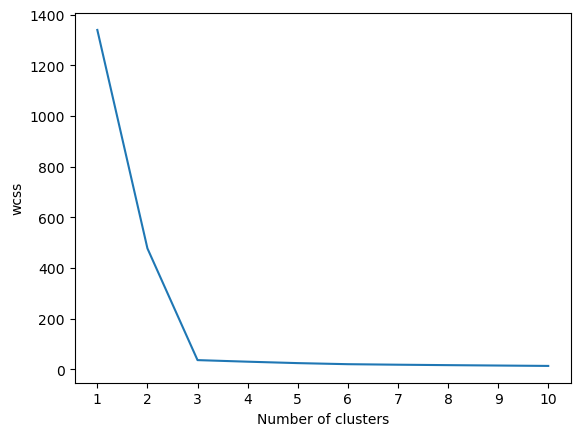

In [23]:
# plot Elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [24]:
kmeans = KMeans(n_clusters=3,init='k-means++')
y_pred = kmeans.fit_predict(x_train)
y_pred

array([0, 0, 1, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 2, 0, 2, 1,
       1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 0,
       1, 2, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2, 2, 1, 0, 1, 2, 1, 2,
       1, 2, 1, 0, 2, 0, 0, 1, 2, 1, 2, 2, 1, 0, 2, 1, 2, 1, 2, 0, 1, 0,
       1, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 0,
       2, 2, 0, 1, 2, 1, 1, 0, 0, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0,
       1, 0, 2, 0, 0, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 0, 1, 0,
       1, 2, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2,
       0, 0, 1, 0, 1, 2, 2, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       2, 1, 1, 2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 1, 2, 1, 0, 2, 2, 1, 2, 0,
       1, 0, 2, 2, 1, 0, 0, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 0, 0, 2, 2,
       1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 2, 0, 0, 1, 0, 1, 0,
       1, 2, 1, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1,
       1, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 2,

In [25]:
y_test_pred = kmeans.fit_predict(x_test)

In [26]:
y_test_pred

array([0, 2, 0, 0, 2, 1, 1, 0, 2, 1, 1, 0, 2, 1, 2, 1, 0, 2, 1, 1, 2, 1,
       2, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 0, 1, 2, 2, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 2, 0, 1, 0, 2, 0, 1, 2, 1,
       0, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1, 1, 1, 2, 2, 0, 1, 2, 1, 0, 1, 0,
       2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 1,
       0, 2, 0, 0, 2, 1, 0, 0, 1, 2, 2, 1, 0, 2, 1, 2, 2, 1, 1, 2, 1, 0,
       2, 2, 2, 0, 0, 0, 2, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 0, 0, 1,
       2, 2, 2, 1, 0, 2, 1, 2, 2, 1, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 0, 1, 0, 0,
       2, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 2, 2, 2, 1,
       2, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2,
       0, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 0, 1, 0, 0, 1, 2, 0, 1, 0, 2, 1,
       0, 2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 1, 2, 0, 0, 2, 0, 1, 1, 2, 0, 1, 2, 1, 1,

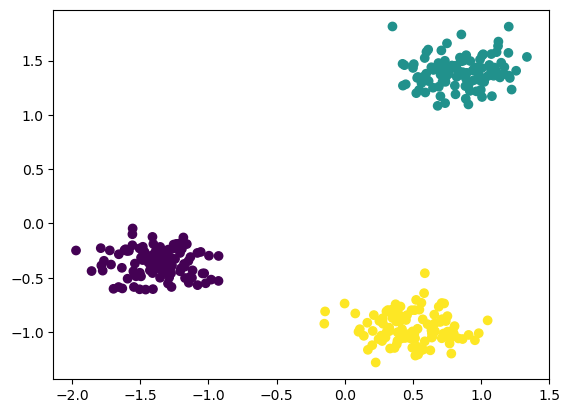

In [27]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test_pred)

## Validating the k value
### 1)kneelocator
### 2)silhoutee scoring

In [28]:
# kneelocator
!pip install kneed

In [32]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [33]:
# silhouette scoring

from sklearn.metrics import silhouette_score

In [35]:
silhuette_coefficients = []
for k in range(2,11) :
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x_train)
    score = silhouette_score(x_train,kmeans.labels_)
    silhuette_coefficients.append(score)

In [36]:
silhuette_coefficients

[0.6655406415292492,
 0.8620301818170378,
 0.7028916755701857,
 0.539013579163442,
 0.3733748627834202,
 0.36073779236816217,
 0.33895780165030426,
 0.33536473016052637,
 0.3353209284946682]

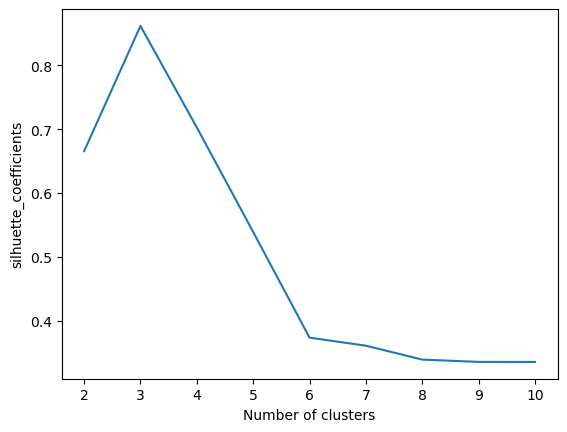

In [38]:
# plot Elbow curve
plt.plot(range(2,11),silhuette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("silhuette_coefficients")
plt.show()